In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('/content/diabetes.csv')

In [62]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [64]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


# missing values handling

In [65]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Data Imputation of 0's

In [66]:
df.shape

(768, 9)

In [67]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


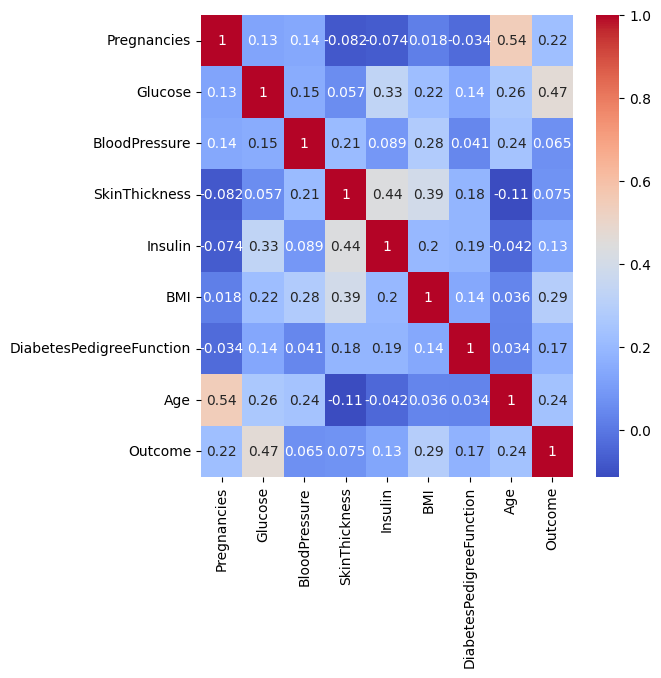

In [68]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.savefig('correlation_coeff.jpg')
plt.show()

# descriptive stats

In [69]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Imputation

<Axes: xlabel='Pregnancies', ylabel='Density'>

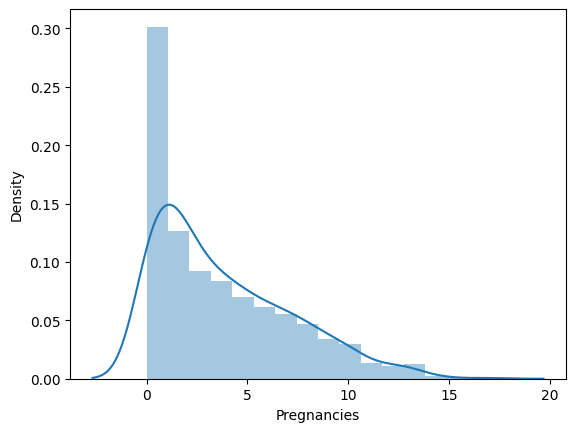

In [70]:
sns.distplot(df.Pregnancies)

<Axes: xlabel='BloodPressure', ylabel='Density'>

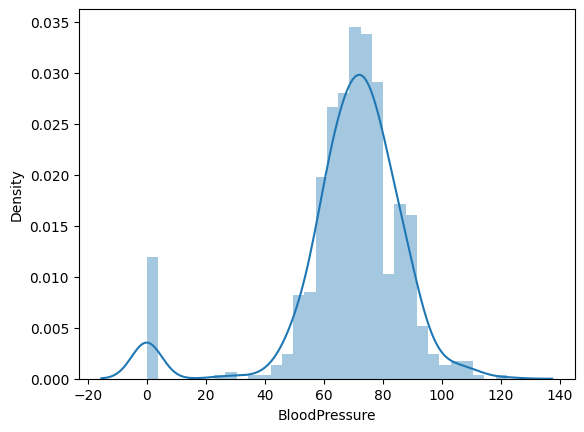

In [71]:
sns.distplot(df.BloodPressure)

<Axes: xlabel='Insulin', ylabel='Density'>

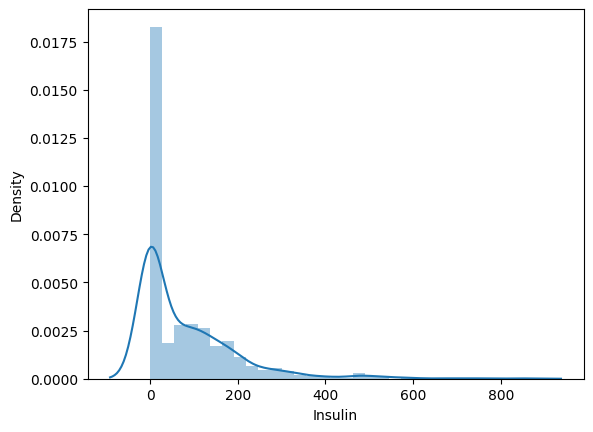

In [72]:
sns.distplot(df.Insulin)

<Axes: xlabel='Glucose', ylabel='Density'>

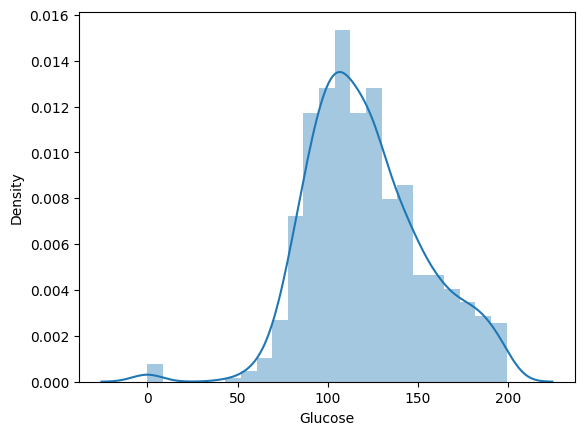

In [73]:
sns.distplot(df.Glucose)

<Axes: xlabel='BMI', ylabel='Density'>

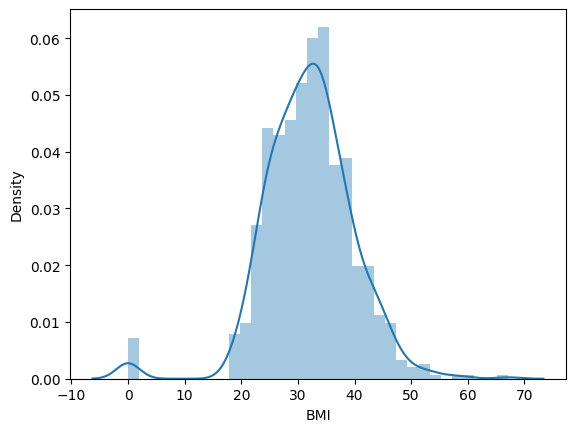

In [74]:
sns.distplot(df.BMI)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

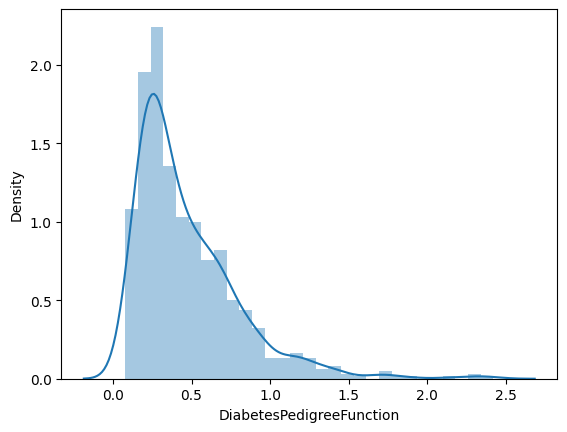

In [75]:
sns.distplot(df.DiabetesPedigreeFunction)

In [76]:
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())

In [77]:
df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].median())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].median())
df['Age'] = df['Age'].replace(0,df['Age'].median())

In [78]:
x = df.drop(columns = 'Outcome', axis =1)
y = df['Outcome']

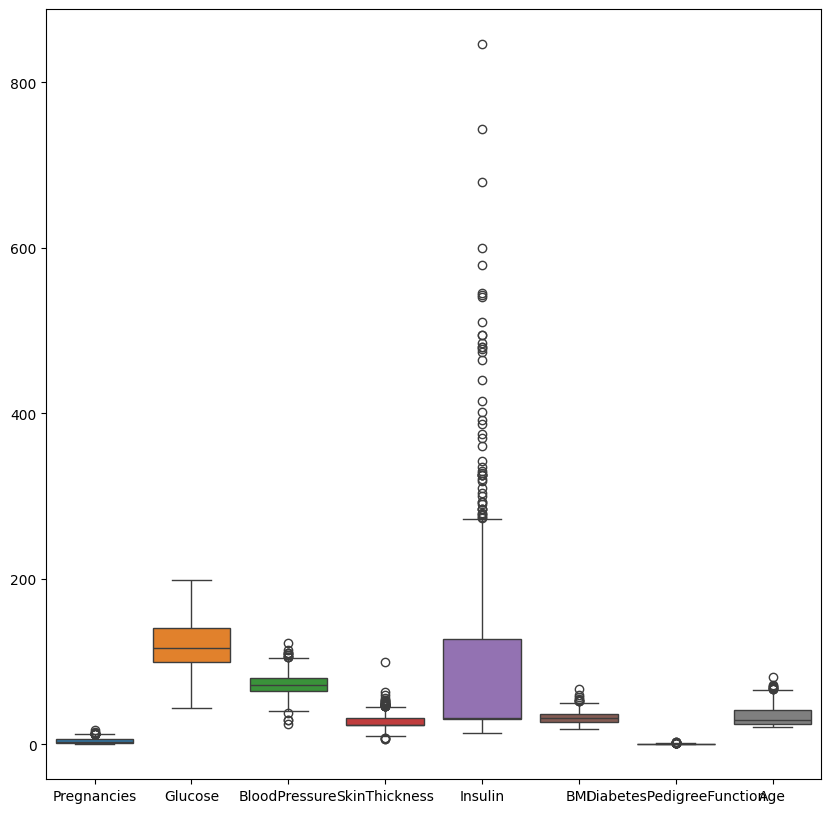

In [79]:
fig , ax = plt.subplots(figsize=(10,10))
sns.boxplot(data = x, ax=ax)
plt.savefig('boxplot.jpg')

In [80]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  Q1 =  df[col].quantile(0.25)
  Q3 =  df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  mask = (x[col] >= lower_bound) & (x[col] <= upper_bound)

In [81]:
x_outlier_detection = x[mask]
y_outlier_detection = y[mask]

In [82]:
x.shape

(768, 8)

In [83]:
y.shape

(768,)

# standardization

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm = sc.fit_transform(x_outlier_detection)

# Model Training

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y_outlier_detection,test_size=0.2,random_state=100)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [88]:
log_r = LogisticRegression()
log_r.fit(x_train,y_train)

LogisticRegression()

In [91]:
y_pred = log_r.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

# Model Evaluation

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [93]:
accuracy_score(y_test,y_pred)

0.7105263157894737

In [94]:
target_names = ["non-diabetic",'diabetic']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

non-diabetic       0.75      0.85      0.80       101
    diabetic       0.59      0.43      0.50        51

    accuracy                           0.71       152
   macro avg       0.67      0.64      0.65       152
weighted avg       0.70      0.71      0.70       152



In [95]:
import pickle
pickle.dump(log_r,open('log_r.pkl','wb'))

In [96]:
classn_model = pickle.load(open('log_r.pkl','rb'))

In [97]:
classn_model.predict(x_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])